# Tarefa em R
Proposta da tarefa 1: https://github.com/gabibatista/me111_notions_of_statistics/blob/master/ME111_Atividade01.pdf

## Parte 1
##### 1.

Repita o experimento descrito acima, mas alterando o número de lançamentos (n) da moeda para n = 10, 20, 30, 50, 100, 500, 1000, 10000. Anote na tabela abaixo o número de caras e as frequências relativas de cara e coroa para cada caso.

In [1]:
n_list <- c(10, 20, 50, 100, 500, 1000, 10000)# números de lançamentos
k_counts <- c()
k_frequencies <- c()
c_frequencies <- c()

for (n in n_list) {
    coins <- sample(0:1, size = n, replace = TRUE) # sorteio aletório entre dois inteiros (0 e 1)
    k_cnt = length(coins[coins==1]) # número de coroas
    k_counts <- append(k_counts, k_cnt)
    k_frequencies <- append(k_frequencies, (k_cnt/n))
    c_frequencies <- append(c_frequencies, ((n-k_cnt)/n))
}

In [2]:
df <- data.frame(n_lancamentos=as.character(n_list), n_caras=k_counts, freq_caras=k_frequencies, freq_coroas=c_frequencies)
df

n_lancamentos,n_caras,freq_caras,freq_coroas
10,4,0.4000,0.6000
20,11,0.5500,0.4500
50,29,0.5800,0.4200
100,51,0.5100,0.4900
500,233,0.4660,0.5340
1000,486,0.4860,0.5140
10000,5029,0.5029,0.4971


##### 2. 
Reproduza o gráfico de barras da Figura 1 para 100 e 1000 lançamentos da moeda. Você pode fazer o gráfico em outro software (Excel ou onde achar mais fácil).

In [3]:
library(ggplot2)
library(reshape2)

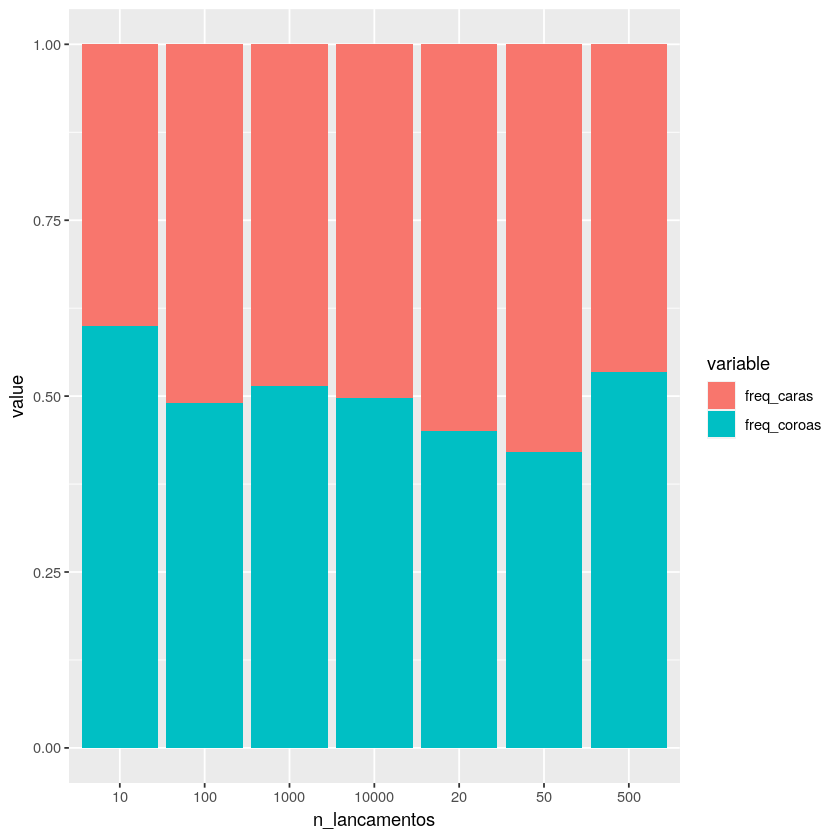

In [4]:
dfm <- melt(df[,c('n_lancamentos','freq_caras','freq_coroas')],id.vars = 1)

ggplot(dfm, aes(x=n_lancamentos, y=value)) +
geom_bar(aes(fill = variable), stat = "identity")

##### 3. 
O que você observa sobre a proporção de caras obtida (frequência relativa) à medida que aumentamos n? Como você representaria isso num gráfico?

<b>Resposta:</b> Observo que a frequência relativa de caras vai se aproximando mais da frequência relativa de coroas à medida que aumentamos n, fazendo com que as duas se aproximem de 50%. Representaria esse comportamente em um gráfico de linhas mostrando a diferença em pontos percentuais entre as duas proporções, que se aproxima de 0 conforme o espaço amostral (número de lançamentos) é aumentado, como mostrado abaixo.

In [5]:
df[['percent_difference']] = df[['freq_caras']] - df[['freq_coroas']]
df

n_lancamentos,n_caras,freq_caras,freq_coroas,percent_difference
10,4,0.4000,0.6000,-0.2000
20,11,0.5500,0.4500,0.1000
50,29,0.5800,0.4200,0.1600
100,51,0.5100,0.4900,0.0200
500,233,0.4660,0.5340,-0.0680
1000,486,0.4860,0.5140,-0.0280
10000,5029,0.5029,0.4971,0.0058


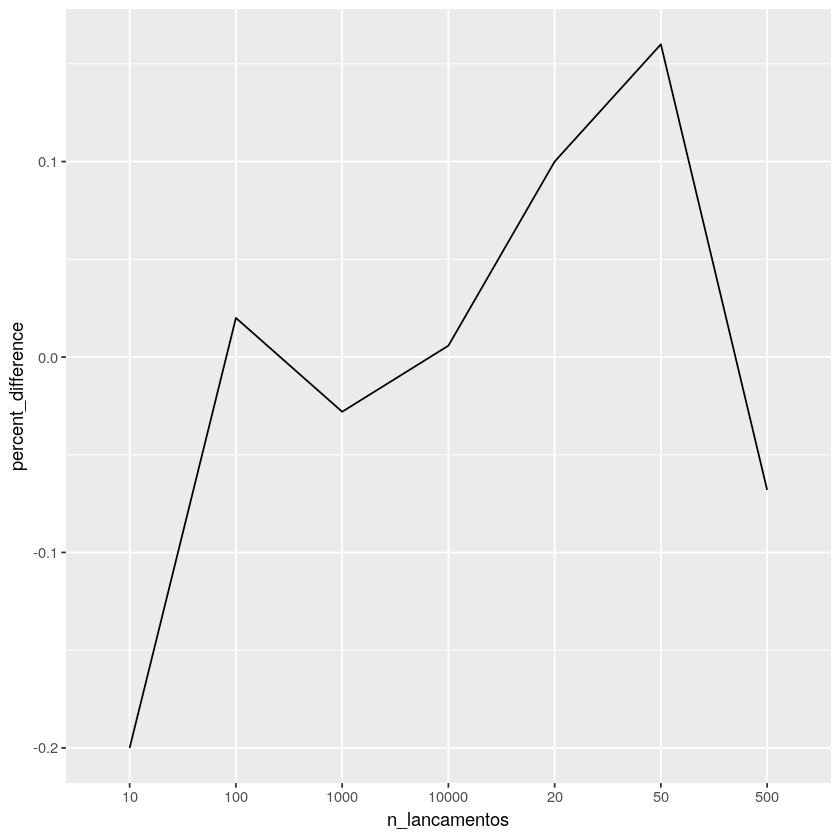

In [6]:
ggplot(data=df) + geom_line(aes(x=n_lancamentos, y=percent_difference, group=1))

## Parte 2
##### 1. 
Repita o experimento do lançamento de um dado, agora alterando o número de lançamentos (n) para n = 10, 30, 50, 100, 600, 1000, 6000, 10000. Anote na tabela abaixo a frequência relativa de cada face para cada caso.

In [7]:
n_list <- c(10, 30, 50, 100, 600, 1000, 6000, 10000) # números de lançamentos
dice_freqs <- c()
results <- c()

for (n in n_list) {
    results <- sample(1:6, size = n, replace = TRUE) # sorteio aletório entre seis inteiros (1 a 6)
    dice_freqs <- rbind(dice_freqs, table(results)/n)
}

In [8]:
df = data.frame(n_lancamentos=n_list, dice_freqs)
df

n_lancamentos,X1,X2,X3,X4,X5,X6
10,0.20000000,0.2000000,0.10000000,0.1000000,0.1000000,0.3000000
30,0.06666667,0.1333333,0.06666667,0.2000000,0.2333333,0.3000000
50,0.20000000,0.1800000,0.18000000,0.0600000,0.2200000,0.1600000
100,0.21000000,0.1700000,0.20000000,0.1700000,0.1700000,0.0800000
600,0.18000000,0.1500000,0.19666667,0.1600000,0.1500000,0.1633333
1000,0.17600000,0.1710000,0.16100000,0.1510000,0.1690000,0.1720000
6000,0.16466667,0.1626667,0.16950000,0.1723333,0.1641667,0.1666667
10000,0.17390000,0.1683000,0.17260000,0.1581000,0.1585000,0.1686000


##### 2. 
Reproduza o gráfico de barras da Figura 2 para 10000 lançamentos do dado. Você pode fazer o gráfico em outro software (Excel ou onde achar mais fácil).

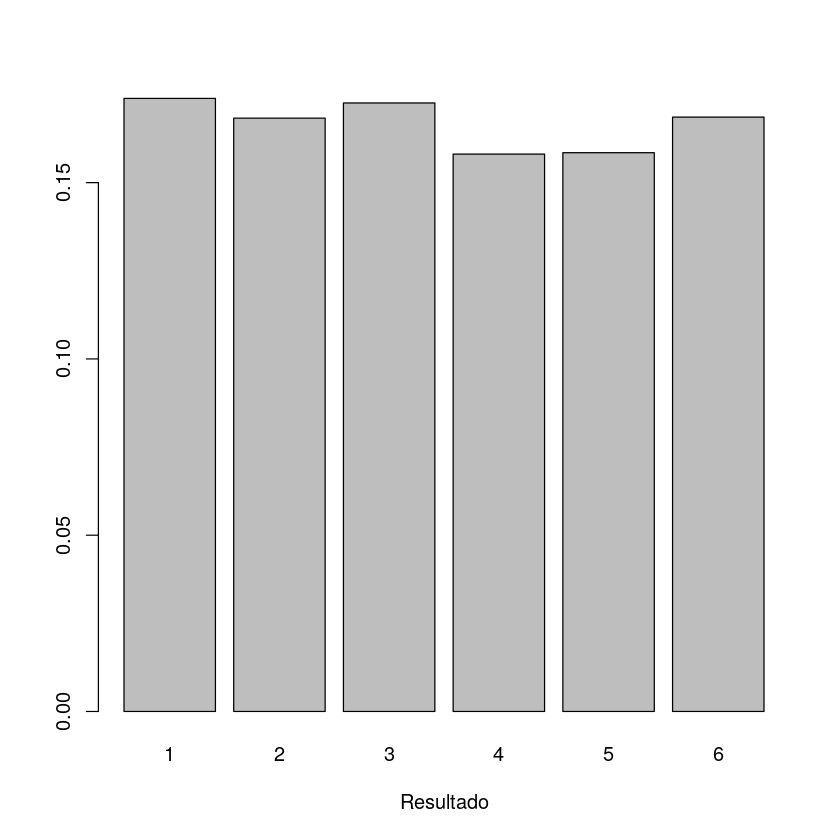

In [9]:
barplot(
    df[df['n_lancamentos'] == '10000'][2:length(df)],
    xlab="Resultado",
    names.arg=seq(1:6)
)

##### 3. 
O que você observa sobre a proporção das faces (frequência relativa) à medida que aumentam

In [10]:
df[2:length(df)]

X1,X2,X3,X4,X5,X6
0.20000000,0.2000000,0.10000000,0.1000000,0.1000000,0.3000000
0.06666667,0.1333333,0.06666667,0.2000000,0.2333333,0.3000000
0.20000000,0.1800000,0.18000000,0.0600000,0.2200000,0.1600000
0.21000000,0.1700000,0.20000000,0.1700000,0.1700000,0.0800000
0.18000000,0.1500000,0.19666667,0.1600000,0.1500000,0.1633333
0.17600000,0.1710000,0.16100000,0.1510000,0.1690000,0.1720000
0.16466667,0.1626667,0.16950000,0.1723333,0.1641667,0.1666667
0.17390000,0.1683000,0.17260000,0.1581000,0.1585000,0.1686000


In [11]:
df['n_lancamentos'] = as.character(n_list)
df

n_lancamentos,X1,X2,X3,X4,X5,X6
10,0.20000000,0.2000000,0.10000000,0.1000000,0.1000000,0.3000000
30,0.06666667,0.1333333,0.06666667,0.2000000,0.2333333,0.3000000
50,0.20000000,0.1800000,0.18000000,0.0600000,0.2200000,0.1600000
100,0.21000000,0.1700000,0.20000000,0.1700000,0.1700000,0.0800000
600,0.18000000,0.1500000,0.19666667,0.1600000,0.1500000,0.1633333
1000,0.17600000,0.1710000,0.16100000,0.1510000,0.1690000,0.1720000
6000,0.16466667,0.1626667,0.16950000,0.1723333,0.1641667,0.1666667
10000,0.17390000,0.1683000,0.17260000,0.1581000,0.1585000,0.1686000


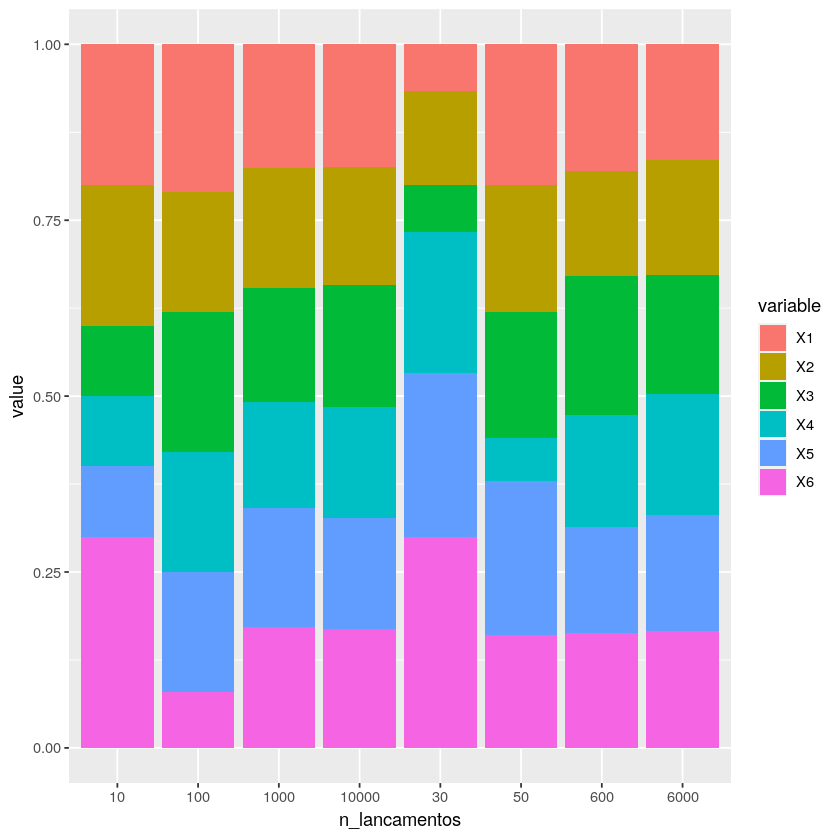

In [12]:
dfm <- melt(df[,c('n_lancamentos','X1','X2', 'X3', 'X4', 'X5', 'X6')],id.vars = 1)

ggplot(dfm, aes(x=n_lancamentos, y=value)) +
geom_bar(aes(fill = variable), stat = "identity")

<b>Resposta:</b> Observo que as frequências relativas referentes à quantidade de vezes que um dado cai com a face para cima fica mais próxima de 16,666...%.